El notebook tiene como objetivo presentar ejemplos de como aplicar modelos de clasificacion, al mismo que familiarizarse con las librerias mas comunes para ML como scikit

# Librerias

In [2]:
## Conjunto de librerias a usar

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias


## fin

# Modelo de Clasificacion

In [2]:
# cargar datos

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# generar datos X-y
X,y = mnist['data'],mnist['target']

# ver dimensiones
print(X.shape)
print(y.shape)

# fin

(70000, 784)
(70000,)


## Ejemplo 1

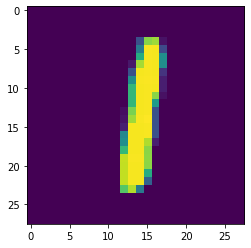

Valor de indice X[ii], valor ii: 58377
valor target y: 1


In [26]:
# Seleccionar aleatoriamente una muestra y visualizar

ii = random.randint(0,X.shape[0])

digito_random = X[ii]
digito = digito_random.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X[ii], valor ii: {}'.format(ii))
print('valor target y: {}'.format(y[ii]))

#print('Matriz de la imagen:\n\n{}'.format(X[ii]))

# fin

In [30]:
# Entrenar un modelo de clasificacion tipo SGD

from sklearn.linear_model import SGDClassifier

# Dividir en conjunto de train y testeo
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# definir modelo y ajustar (entrenar)
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train)

# Indicadores de rendimiento del clasificador
print('Matriz de confusion:\n{}'.format(confusion_matrix(y_test,sgd.predict(X_test))))

print('\n\nReporte de Clasificacion: {}'.format(classification_report(y_test,sgd.predict(X_test))))
# fin

Matriz de confusion:
[[1633    0   31    3    3   21   19    0    5    0]
 [   0 1858   59    7    2   18    2    4   18    3]
 [   7   14 1669    4   15    9   14   19   33    2]
 [  13    4  122 1469    3   86    5   15   24   22]
 [   0    2   43   16 1527   13   10    8    8   49]
 [  28    3   33   50   20 1366   24    8   42   19]
 [  10    5   68    2   10   36 1570    2    7    0]
 [   5    6   57   10   22   13    2 1633    6   83]
 [  10   17  137   47   18  163   12   10 1263   36]
 [   1    6   36   44   75   43    0   67   17 1447]]


In [33]:
# Matriz de confusion para los datos de testeo

print('Matriz de confusion:\n{}'.format(confusion_matrix(y_test,sgd.predict(X_test))))

print('\n\nReporte de Clasificacion:\n\n {}'.format(classification_report(y_test,sgd.predict(X_test))))

Matriz de confusion:
[[1633    0   31    3    3   21   19    0    5    0]
 [   0 1858   59    7    2   18    2    4   18    3]
 [   7   14 1669    4   15    9   14   19   33    2]
 [  13    4  122 1469    3   86    5   15   24   22]
 [   0    2   43   16 1527   13   10    8    8   49]
 [  28    3   33   50   20 1366   24    8   42   19]
 [  10    5   68    2   10   36 1570    2    7    0]
 [   5    6   57   10   22   13    2 1633    6   83]
 [  10   17  137   47   18  163   12   10 1263   36]
 [   1    6   36   44   75   43    0   67   17 1447]]


Reporte de Clasificacion:

               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1715
           1       0.97      0.94      0.96      1971
           2       0.74      0.93      0.83      1786
           3       0.89      0.83      0.86      1763
           4       0.90      0.91      0.91      1676
           5       0.77      0.86      0.81      1593
           6       0.95      0.92      

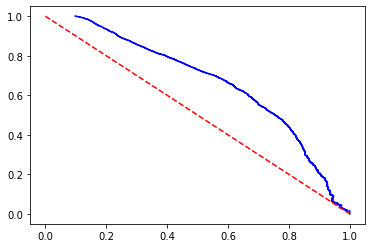

In [50]:
## Predecir el Valor '8'

# Seleccionar los datos donde el valor de salida (y) fue 8
y_train_t = (y_train=='8')
y_scores = skl.model_selection.cross_val_predict(sgd, X_train, y_train_t, cv=5,method="decision_function")

# Calculo de la curva ROC 
precision, recall, thresholds = precision_recall_curve(y_train_t,y_scores)
plt.plot(precision,recall,'-b')
plt.plot([0,1],[1,0],'--r')
plt.show()

# fin

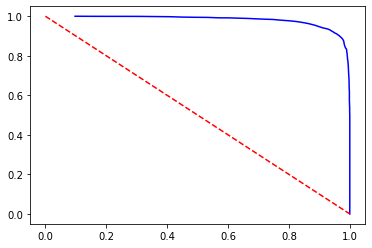

In [52]:
## Predecir el Valor '8'

forest = skl.ensemble.RandomForestClassifier(random_state=42)
y_train_f = (y_train=='8')
y_scores_f = skl.model_selection.cross_val_predict(forest,X_train,y_train_f,cv=5,method='predict_proba')

precision_f, recall_f, thresholds_f = precision_recall_curve(y_train_f,y_scores_f[:,1])
plt.plot(precision_f,recall_f,'-b')
plt.plot([0,1],[1,0],'--r')
plt.show()
# fin

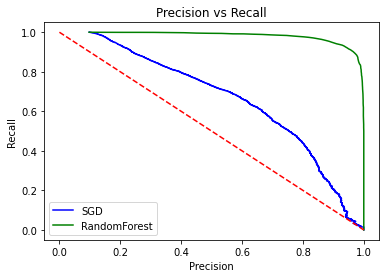

In [58]:
# Ploteo de SGD and RandomForest juntos -  Predecir el Valor '8'

plt.plot(precision,recall,'-b',label='SGD') ## SGD
plt.plot(precision_f,recall_f,'-g',label='RandomForest') ## RANDOM FOREST
plt.plot([0,1],[1,0],'--r')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.legend(loc='best')
plt.show()

# fin

## Ejemplo 2

In [59]:
# entrenar clasificador multi-valores

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train)

# fin

SGDClassifier(random_state=42)

In [60]:
# Ver matriz de rendimientos por cada valor de salida ... es decir, se trata de forma independiente cada salida

print('Reporte de clasificacion: \n{}'.format(classification_report(y_test,sgd.predict(X_test))))

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1715
           1       0.97      0.94      0.96      1971
           2       0.74      0.93      0.83      1786
           3       0.89      0.83      0.86      1763
           4       0.90      0.91      0.91      1676
           5       0.77      0.86      0.81      1593
           6       0.95      0.92      0.93      1710
           7       0.92      0.89      0.91      1837
           8       0.89      0.74      0.81      1713
           9       0.87      0.83      0.85      1736

    accuracy                           0.88     17500
   macro avg       0.89      0.88      0.88     17500
weighted avg       0.89      0.88      0.88     17500



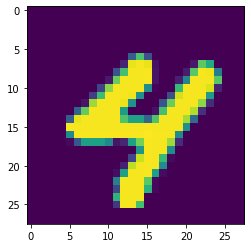

Valor de indice X[ii], valor ii: 14348
valor target y: 4

Valores de Decision:
[[ -20485.13334688 -109628.27606906  -22328.95626209  -26516.07997273
     3353.53353005  -10200.6411333   -23560.80476433   -9371.81479007
    -9004.23606108   -1470.65208786]]

Valor: 4


In [83]:
# Seleccionar aleatoriamente una muestra y visualizar

ii = random.randint(0,X_test.shape[0])

digito_random = X_test[ii]
digito = digito_random.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X[ii], valor ii: {}'.format(ii))
print('valor target y: {}'.format(y_test[ii]))

print('\nValores de Decision:')
print(sgd.decision_function([digito_random]))
print('\nValor: {}'.format(np.argmax(sgd.decision_function([digito_random]))))

# fin

In [85]:
# Validacion ajuste de modelo 

y_pred = skl.model_selection.cross_val_predict(sgd,X_train,y_train,cv=5)
matriz_confusion = confusion_matrix(y_train,y_pred)

matriz_confusion

# fin

array([[4925,    1,   40,   17,    2,   38,   47,    6,   92,   20],
       [   3, 5647,   43,   31,    5,   25,   17,    8,  103,   24],
       [  33,   30, 4567,  143,   42,   38,  107,   55,  164,   25],
       [  16,   14,  212, 4425,   13,  234,   20,   51,  284,  109],
       [  15,   21,   61,   30, 4408,   26,   64,   27,  147,  349],
       [  38,   18,   53,  223,   44, 3821,   98,   19,  315,   91],
       [  44,   11,   78,    7,   21,   94, 4815,    2,   92,    2],
       [  23,   13,   83,   45,   56,   21,    5, 4730,   42,  438],
       [  39,   79,  121,  243,   23,  242,   38,   21, 4144,  162],
       [  23,   16,   43,   74,  129,   70,    0,  158,  177, 4532]],
      dtype=int64)

In [87]:
## Matriz con valores borrosos

noise = np.random.randint(0,100,(len(X_train),784))
X_train_noise = X_train + noise

noise = np.random.randint(0,100,(len(X_test),784))
X_test_noise = X_test + noise

y_train_noise = X_train
y_test_noise = X_test

## fin

## Ejemplo 3

In [91]:
# Ajustar un modelo de clasificacion por vecinos Cercanos 

knn=KNeighborsClassifier()
knn.fit(X_train_noise, y_train_noise)

KNeighborsClassifier()

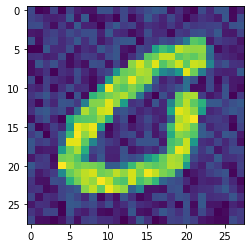

Valor de indice X[ii], valor ii: 7637


In [93]:
## Matriz con valores borrosos

ii = random.randint(0,X_test_noise.shape[0])

digito_random = X_test_noise[ii]
digito = digito_random.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X[ii], valor ii: {}'.format(ii))
#print('valor target y: {}'.format(y_test_noise[ii]))

# fin

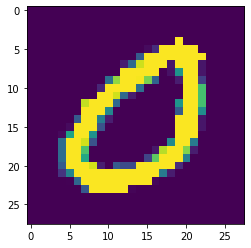

In [94]:
## Ver prediccion:

digito_noise = knn.predict([digito_random])
digito_noise = digito_noise.reshape(28, 28) ## reshape
plt.imshow(digito_noise, interpolation='nearest')
plt.show()

# fin